<a href="https://colab.research.google.com/github/SuhelAnsari9272/Airbnb_booking_analysis/blob/main/Md_Suhel_Ansari__Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#### 1. Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 3.Creating DataFrame and Exploring its DataTypes

In [ ]:
file_path='/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path)

In [ ]:
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
airbnb_df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:

airbnb_df.dtypes.reset_index().rename(columns={'index':'Columns',0:'DataTypes'})

,Columns,DataTypes
0,id,int64
1,name,object
2,host_id,int64
3,host_name,object
4,neighbourhood_group,object
5,neighbourhood,object
6,latitude,float64
7,longitude,float64
8,room_type,object
9,price,int64


In [ ]:
airbnb_df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [ ]:
airbnb_df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

#### 4. Checking for null values

In [ ]:
# Percent of null values in Columns.

for column in airbnb_df.columns:
  print(f'Percent of null values in {column} is : {np.round(airbnb_df[column].isnull().mean()*100,2)} %')

Percent of null values in id is : 0.0 %
Percent of null values in name is : 0.03 %
Percent of null values in host_id is : 0.0 %
Percent of null values in host_name is : 0.04 %
Percent of null values in neighbourhood_group is : 0.0 %
Percent of null values in neighbourhood is : 0.0 %
Percent of null values in latitude is : 0.0 %
Percent of null values in longitude is : 0.0 %
Percent of null values in room_type is : 0.0 %
Percent of null values in price is : 0.0 %
Percent of null values in minimum_nights is : 0.0 %
Percent of null values in number_of_reviews is : 0.0 %
Percent of null values in last_review is : 20.56 %
Percent of null values in reviews_per_month is : 20.56 %
Percent of null values in calculated_host_listings_count is : 0.0 %
Percent of null values in availability_365 is : 0.0 %


#### 5.Handling NaN values Spliting the dataset into 2 parts:
* reviewed dataset having non-null review columns
* non-reviewed dataset having null review columns

In [ ]:
# 2 empty lists to capture the ids for the nan values of host_name and name columns respectively
id_for_nan_host_name = []
for val in airbnb_df.loc[airbnb_df.host_name.isna()]['host_id']:
  id_for_nan_host_name.append(val)

id_for_nan_name = []
for val in airbnb_df.loc[airbnb_df.name.isna()]['id']:
  id_for_nan_name.append(val)


In [ ]:
def name_finder(id,name,id_list):
  '''This function checks if the id for name with nan value has any repeatation in other part of the the name column
    with some legitimate names. '''

  for i in range(airbnb_df.shape[0]):
    if id[i] in id_list:
      if name[i] != np.nan:
        print(name[i])
      else:
        pass
    else:
      pass

In [ ]:

name_finder(airbnb_df.id,airbnb_df.name,id_for_nan_host_name)
name_finder(airbnb_df.id,airbnb_df.name,id_for_nan_name)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


We find that the nan values of the column name and host_name doesn't have any legitimate name mentioned in the dataset which we tried seaching using their ids and host_ids respectively.

Hence, we tried to replace those nan values with 'no name'.

In [ ]:
# Handilng NaN values from Name and host_name column

# airbnb_df[['name','host_name']].replace(np.nan,'no name',inplace=True)
airbnb_df[['name','host_name']] = airbnb_df[['name','host_name']].fillna('no name')

In [ ]:
# Converting the time string  to datetime format

airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [ ]:

# Splitting the dataset into reviewed_df for non null review data and non_reviewed_df for null review values.

reviewed_df = airbnb_df.loc[~airbnb_df.last_review.isna() & ~airbnb_df.reviews_per_month.isna()]
reviewed_df.reset_index().drop('index',axis=1,inplace=True)

non_reviewed_df = airbnb_df.loc[airbnb_df.last_review.isna() & airbnb_df.reviews_per_month.isna()]
non_reviewed_df.reset_index().drop('index',axis=1,inplace=True)

In [ ]:
# Replacing nan values of last_review and review_per_month of non_reviewed_df with 0. As we will analysing other aspects of for set.
non_reviewed_df[['last_review','reviews_per_month']] = non_reviewed_df[['last_review','reviews_per_month']].fillna(0) 

In [ ]:
reviewed_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1


In [ ]:
non_reviewed_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0,0.0,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,0,0.0,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0,0.0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0,0.0,1,365


In [ ]:

reviewed_df.last_review.dt.year.value_counts()

2019    25209
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: last_review, dtype: int64

##Suhel
## What can we learn from predictions? (ex: locations, prices, reviews, etc)

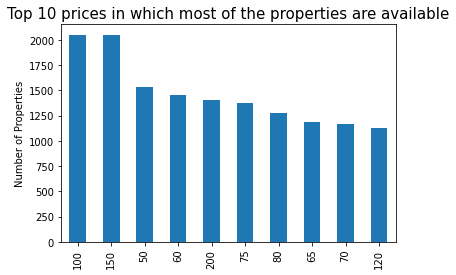

In [ ]:
#At what price most of the properties are available
most_property=airbnb_df['price'].value_counts().sort_values(ascending=False)
Top_10_mp=most_property[0:10]
Top_10_mp.plot(kind='bar')
plt.title('Top 10 prices in which most of the properties are available',fontsize=15)
plt.ylabel('Number of Properties')
plt.xlabel=('Price of property')

* Above graph shows the Top 10 price in which most of the properties are available.
* The price ranges the from <b> 50 to 200 </b>
* Most of the properties are available in price of <b> 100 & 150.</b>
* Properties are available for low price and in high price also.

In [ ]:
# Average price of property in different neighbourhood_group
Avg_ppp_ng=pd.DataFrame(airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False))
df = pd.DataFrame()
df['Average_price']=Avg_ppp_ng
df['Neighbourhood_group']=list(Avg_ppp_ng.index)
# plotting the bar chart
fig = px.bar(df, x="Neighbourhood_group", y="Average_price",title='Average price of property in different neighbourhood_group')
 
# showing the plot
fig.show()

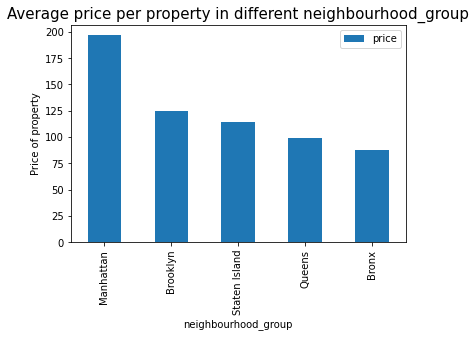

In [ ]:
#Average price per property in different neighbourhood_group
Avg_ppp_ng=pd.DataFrame(airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False))
Avg_ppp_ng.plot(kind='bar')
plt.title('Average price per property in different neighbourhood_group',fontsize=15)
plt.ylabel('Price of property')
plt.xlabel=('Neighbourhood_group')


* In <b> Manhattan </b> the average price of property is <i> most costly ,ie. almost <b> 197 </b></i>.
* The Average price of property in <b> Bronx </b> is least among all of them.<b> ie. 90.</b>
* The Average price of a property in <b> Staten Island</b> is almost <b> 110</b>.
* The Average price of a property in <b> Queens </b> is almost <b>100</b>.
* The Average price of a property in <b> Brooklyn </b> is almost <b>125.

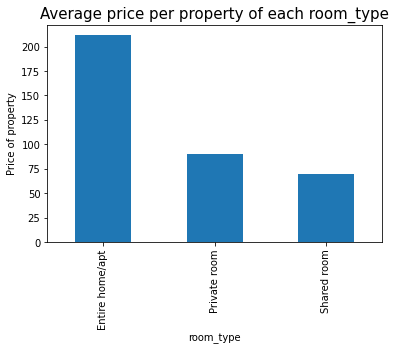

In [ ]:
#Average price per property of each room_type
room_types=['Entire home/apt','Private room','Shared room']
Avg_ppp_rt=airbnb_df.groupby('room_type')['price'].mean().sort_values(ascending=False)
df=pd.DataFrame()
df['Room_type']=room_types
df['Average_price']=Avg_ppp_rt

Avg_ppp_rt.plot(kind='bar')

plt.title('Average price per property of each room_type',fontsize=15)
plt.ylabel('Price of property')
plt.xlabel=('Neighbourhood_group')


* <b> Entire home/apt </b> is most costly than others.
* The average price for  a <b> Private room </b> is  <b> 90 </b>
* <b> Shared room </b> is availabale for least price .ie <b> 70 </b>

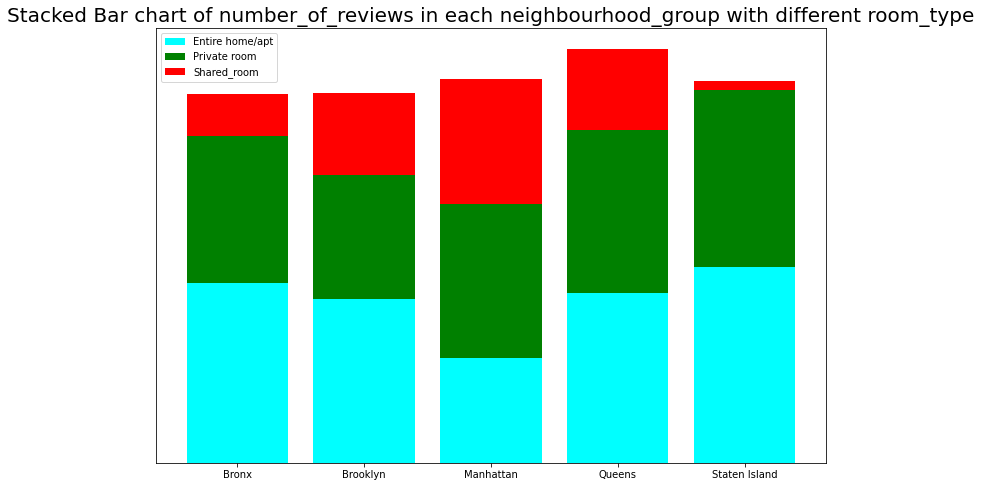

In [ ]:
#To show the number of reviews in each neighbourhood_group with different room_types
nbrhood_grp=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
review_per_rt_nbrgrp=airbnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean()

s=0
y1,y2,y3=[],[],[]
for i in range(len(nbrhood_grp)):
  y1.append(review_per_rt_nbrgrp[s+i])
  y2.append(review_per_rt_nbrgrp[s+i+1])
  y3.append(review_per_rt_nbrgrp[s+i+2])
  s+=2

y1,y2,y3=np.array(y1),np.array(y2),np.array(y3)

#Plot Stacked bar chart
plt.rcParams['figure.figsize'] = (12,8)
plt.bar(nbrhood_grp,y1, color='cyan', label='Entire home/apt')
plt.bar(nbrhood_grp,y2, bottom=y1, color='green', label='Private room')
plt.bar(nbrhood_grp,y3, bottom=y1+y2, color='red', label='Shared_room')
plt.title('Stacked Bar chart of number_of_reviews in each neighbourhood_group with different room_type',fontsize=20)
plt.xlabel=('Neighbourhood_group')
plt.ylabel('Number of reviews')
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.legend()
plt.show()


* In all the neighbourhood_groups <b>except Manhattan, Entire home/ apt </b> is most number of reviews.
* <b> Manhattan </b> has the highest number of reviews for <b> Private room.</b>
* <b> Brooklyn </b> has least number of reviews for <b> Shared room </b>
* <b> Staten Island </b> has least number of reviews for <b> Shared room</b> and highest number of reviews for <b>Private room among all neighbourhood_groups</b>.


In [ ]:
import plotly.express as px
 
df = px.data.tips()
 
fig = px.box(airbnb_copy_df, x = 'neighbourhood_group', y="price",color='room_type', points="outliers")
fig.show()

* <b> Staten Island </b> has least median price of <b><i> Shared room </b></i> among all neighbourhood_groups.
* <b>Manhatten </b> is most costly for all the room types.
* <b> Bronx </b> have least variablity in price of rooms_types among all neighbourhood groups & maximum variablity is present in <b> Manhattan.</b>
* <b>Private room </b> is most costly in <b><i> Manhattan </b></i> and is cheaper at <b><i> Staten Island and Bronx .</b></i>
* The price distribution of <b>Shared room </b> is almost same in <b><i> Brooklyn & Queens</b></i>.
* The price of <b> Entire home/apt </b> is highest in <b><i> Manhattan.Staten Island & Bronx </b></i> charges less for <b>Entire home/apt</b>.

In [ ]:
#To see the distribution of price in different neighbourhood_group 
#for neighbourhood in neighbourhood_group_list:
 # nbrhood_price_df[neighbourhood]=np.array(airbnb_df[airbnb_df['neighbourhood_group']==neighbourhood])

Brooklyn_df=airbnb_df[airbnb_df['neighbourhood_group']=='Brooklyn']
Brooklyn_price=list(Brooklyn_df['price'])
Manhattan_df=airbnb_df[airbnb_df['neighbourhood_group']=='Manhattan']
Manhattan_price=list(Manhattan_df['price'])
Queens_df=airbnb_df[airbnb_df['neighbourhood_group']=='Queens']
Queens_price=list(Queens_df['price'])
Staten_island_df=airbnb_df[airbnb_df['neighbourhood_group']=='Staten Island']
Staten_island_price=list(Staten_island_df['price'])
Bronx_df=airbnb_df[airbnb_df['neighbourhood_group']=='Bronx']
Bronx_price=list(Bronx_df['price'])

#nbrhood_price_df=pd.DataFrame({'Brooklyn':Brooklyn_price,'Manhattan':Manhattan_price,'Queens':Queens_price,'Staten_Island':Staten_island_price,'Bronx':Bronx_price})
nbrhood_price_df=[Brooklyn_price,Manhattan_price,Queens_price,Staten_island_price,Bronx_price]
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(nbrhood_price_df)
#ax=nbrhood_price_df[['Brooklyn','Manhattan','Queens','Staten_Island','Bronx']].plot(kind='bar',title='boxplot')
plt.show()

In [ ]:
airbnb_copy_df=airbnb_df.copy()
#Creating funtion to remove outlier using Inter Quantile Range
def outlier_treatment(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
  
lowerbound,upperbound = outlier_treatment(airbnb_df['price'])
airbnb_copy_df.drop(airbnb_copy_df[ (airbnb_copy_df['price'] > upperbound) | (airbnb_copy_df['price'] < lowerbound) ].index , inplace=True)

In [ ]:
#To see the distribution of price in different neighbourhood_group 
#for neighbourhood in neighbourhood_group_list:
 # nbrhood_price_df[neighbourhood]=np.array(airbnb_df[airbnb_df['neighbourhood_group']==neighbourhood])

Brooklyn_df1=airbnb_copy_df[airbnb_copy_df['neighbourhood_group']=='Brooklyn']
Brooklyn_price1=list(Brooklyn_df1['price'])
Manhattan_df1=airbnb_copy_df[airbnb_copy_df['neighbourhood_group']=='Manhattan']
Manhattan_price1=list(Manhattan_df1['price'])
Queens_df1=airbnb_copy_df[airbnb_copy_df['neighbourhood_group']=='Queens']
Queens_price1=list(Queens_df1['price'])
Staten_island_df1=airbnb_copy_df[airbnb_copy_df['neighbourhood_group']=='Staten Island']
Staten_island_price1=list(Staten_island_df1['price'])
Bronx_df1=airbnb_copy_df[airbnb_copy_df['neighbourhood_group']=='Bronx']
Bronx_price1=list(Bronx_df1['price'])

#nbrhood_price_df=pd.DataFrame({'Brooklyn':Brooklyn_price,'Manhattan':Manhattan_price,'Queens':Queens_price,'Staten_Island':Staten_island_price,'Bronx':Bronx_price})
nbrhood_price_df1=[Brooklyn_price1,Manhattan_price1,Queens_price1,Staten_island_price1,Bronx_price1]
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(nbrhood_price_df1)
#ax=nbrhood_price_df[['Brooklyn','Manhattan','Queens','Staten_Island','Bronx']].plot(kind='bar',title='boxplot')
plt.show()

In [ ]:
import plotly.express as px
 
df = px.data.tips()
 
fig = px.box(airbnb_copy_df, x = 'neighbourhood_group', y="price",color='room_type', points="outliers")
fig.show()

In [ ]:
#Creating parto charts for the 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
for i in nbrhood_grp:
  nbrhood_df=airbnb_df[airbnb_df['neighbourhood_group']== i]
  nbr_df =pd.DataFrame(nbrhood_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False))
  nbr_df["cumpercentage"] = nbr_df["price"].cumsum()/nbr_df["price"].sum()*100

  col1,col2,line_size = 'steelblue','red',4
  fig, ax = plt.subplots()

  ax.bar(nbr_df.index,nbr_df['price'], color=col1)
  #add cumulative percentage line to plot
  ax2 = ax.twinx()
  ax2.plot(nbr_df.index, nbr_df['cumpercentage'], color=col2, marker="D", ms=line_size)
  ax2.yaxis.set_major_formatter(PercentFormatter())
  #specify axis colors
  ax.tick_params(axis='y', colors=col1)
  ax2.tick_params(axis='y', colors=col2)
  ind=list(nbr_df.index)
  plt.draw()
  ax.set_xticklabels(ax.get_xticks(), rotation =90)
  #display the Pareto chart
  plt.rcParams['figure.figsize'] = (15,5)
  plt.title(f'Pareto chart for neighbours of {i} showing their contribution in neighbourhood_group',fontsize=15)
  ax.set_ylabel('Price')
  ax2.set_ylabel('Cumulative percentage')
  ax.set_xlabel(f'Neighbours of {i}')
  plt.xticks(nbr_df.index,ind,rotation='vertical')
  plt.show()


* In <b> Bronx </b> the neighbours <b><i> Riveredale, City Island, Spuytan Duyvil,Eastchester, Unionport,Westchester Square and West Farms </b></i> contributes almost <b>30%</b> in total economy of <b> Bronx.</b>
* In <b>Brooklyn </b> the neighbours <b><i> Sea Gate,Cobble Hill, Brooklyn Heights, DUMBO, Vinegar Hill, Clinton Hill, Mill Basin, Park Slope, Boerum Hill and Carroll Gardens </b></i> contributes almost <b>40%</b> in total economy of <b> Brooklyn </b>.
*For <b> Manhattan </b> the<b> half (50%)</b> of the its economy comes from the top 10 contributers i.e.<b><i> Tribecca, Battery Park City, Flatiron District, NoHo, SoHo, Midtown, West Village, Greenwich Village, Chelsea and Theator District.</b></i>
*For the neighbourhood_group <b> Queens</b> the top 14 neighbours contribute <b> almost 40% </b>of total economy of this neighbourhood_group.
*The neighbours <b><i> Fort Wadsworth, Woodrow, Price's Bay and Randall Manor </b></i> contributes 40% of total economy of <b> Staten Island. 

### Total bookings in different years

TypeError: ignored

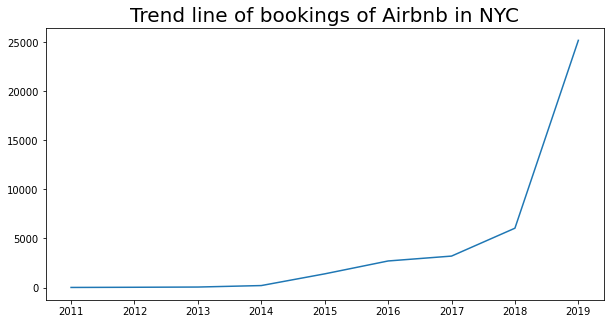

In [ ]:
# Create a variable month to denote the transaction month
reviewed_df['last_review_month']= reviewed_df['last_review'].apply(lambda x: x.strftime("%Y-%m-%d") [:7])

# Create a variable year for the last review year
reviewed_df['last_review_year']= reviewed_df['last_review'].apply(lambda x: x.strftime("%Y-%m-%d") [:4])
reviewed_df.head(3)

yearly_bookings_vol = reviewed_df["last_review_year"].value_counts().sort_values(ascending=True)
#plotting trend of monthly_bookings_vol for different years
plt.rcParams['figure.figsize']=(10,5)
plt.plot(yearly_bookings_vol)
plt.title('Trend line of bookings of Airbnb in NYC',fontsize=20)
plt.xlabel('Years',fontsize=10)
plt.ylabel('Total number of bookings')


* The trend line rises exponentially from 2018 to 2019.
*Airbnb has huge number of bookings in the year 2019 at NYC

TypeError: ignored

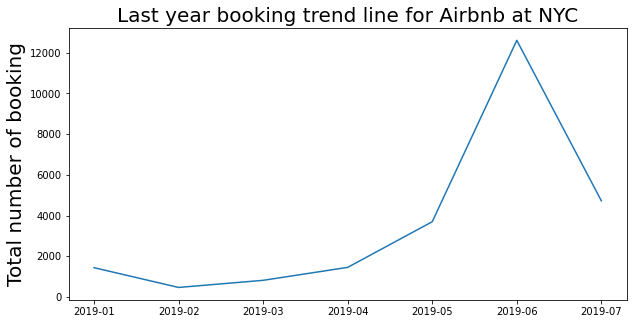

In [ ]:
#new dataframe for last year
last_year_df=reviewed_df[reviewed_df['last_review_month'] >= '2019-01']

#Total number of bookings in last year 2019
last_year_review_month=last_year_df.loc[:,'last_review_month']
monthly_booking_vol=last_year_review_month.value_counts()
monthly_booking_vol.sort_index(inplace=True)

#Plotting trend line for last year
plt.rcParams['figure.figsize']=(10,5)
plt.plot(monthly_booking_vol)
plt.title('Last year booking trend line for Airbnb at NYC',fontsize=20)
plt.ylabel('Total number of booking',fontsize=20)
plt.xlabel('Months',fontsize=10)

* In 2019, most number of bookings has been done in month of <b> June </b>

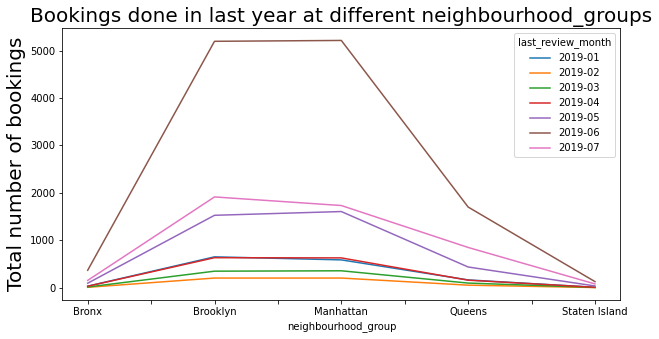

In [ ]:
# Bookings in different neighbourhood_groups in last year
last_yr_review_nbrhood=last_year_df.groupby(['neighbourhood_group','last_review_month'])['last_review_month'].count().unstack()
last_yr_review_nbrhood
#plot of bookings for the different neighbourhood_groups
last_yr_review_nbrhood.plot()
plt.title('Bookings done in last year at different neighbourhood_groups',fontsize=20)
plt.ylabel('Total number of bookings',fontsize=20)
plt.xlabel=('Neighbourhood_groups')

* For the month of <b> June </b> huge number of bookings has been done in all the neighbourhood groups.
* Particularly for <b> Manhattan </b> and <b> Brooklyn </b> has maximum number of bookings in June 2019.

Custom question

An year ago on 2018 I came along with my collegues stayed in Brooklyn for a business meeting. The bookings of room per head for a week costs me $120. 

But our next meeting is in the year 2020 in Manhattan. So will a amount of $200 per head is sufficient.

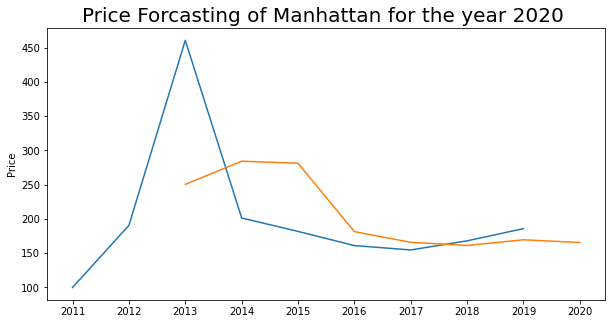

In [ ]:
# Create a variable year for the last review year
reviewed_df['last_review_year']= reviewed_df['last_review'].apply(lambda x: x.strftime("%Y-%m-%d") [:4])
reviewed_df.head(3)

manhattan_custom_df =reviewed_df[(reviewed_df['neighbourhood_group']=='Manhattan')& (reviewed_df['minimum_nights']<=7)]
manhattan_custom_df.head(3)
manhattan_custom_df.shape

manhattan_yearly_price = manhattan_custom_df.groupby("last_review_year")['price'].mean()
manhattan_yearly_price.sort_index(inplace=True)
x=list(manhattan_yearly_price.index)
x1=x[2:]
x1

#Calculation of 3 year moving average monthly price for manhattan
moving_avg=[]
for i in range(len(manhattan_yearly_price)-2):
  a=manhattan_yearly_price[i:i+3].mean()
  moving_avg.append(a)

len(moving_avg)

#Forecasting price for 2020 in Manhattan
mv_avg_2020=sum(moving_avg[-3:])/3
moving_avg.append(mv_avg_2020)

#plotting for 2020
x1.append('2020')
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(x,list(manhattan_yearly_price))
plt.plot(x1,moving_avg)
plt.title('Price Forcasting of Manhattan for the year 2020 ',fontsize=20)
plt.ylabel('Price')
plt.xlabel=('Year')

hypothesis questions:

Null Hypothesis : Mean price of all the room_type are equal

Alternative hypothesis : Mean price of all the room_type is not equal

test statistic  : ANOVA   or Multiple t-tests

In [ ]:
#hypothesis questions:
#Null Hypothesis : Mean price of all the room_type are equal
#Alternative hypothesis : Mean price of all the room_type is not equal
#test statistic  : ANOVA   or Multiple t-tests

#Null hypothesis:Mean price of the private rooms is same in all the neighbourhood_groups
#Alternative hypothesis: Mean price of the private rooms is different in all the neighbourhood_groups
#test statistic : ANOVA

#Null hypothesis: Room type is independent of neighbourhood_groups
#Alternative hypothesis: Room type is dependent of neighbourhood_groups
#test statistic: chi-square

In [ ]:

import random
# random sample for 500 unique host_ids
unique_host_id = list(airbnb_df['host_id'].unique())
random.seed(30) # set a seed so that everytime we will extract same sample
sample_bookings_id = list(random.sample(unique_host_id, 500))
sample_df = airbnb_df[airbnb_df['host_id'].isin(sample_bookings_id)].reset_index(drop=True)

# two variables of interest
sample_df = sample_df[['room_type', 'price']]
groups = sample_df.groupby('room_type').count().reset_index()

#Sample under observation
groups

,room_type,price
0,Entire home/apt,552
1,Private room,298
2,Shared room,19


In [ ]:
import scipy.stats as stats

# Creating ANOVA table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# SSTR (Sum of squares due to treatment)
x_bar = sample_df['price'].mean()
SSTR = sample_df.groupby('room_type').count() * (sample_df.groupby('room_type').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['price'].sum()

# SSE (Sum of squares due to error)
SSE = (sample_df.groupby('room_type').count() - 1) * sample_df.groupby('room_type').std()**2
anova_table['SS']['Within Groups'] = SSE['price'].sum()

# TSS (Total sum of squares)
TSS = SSTR['price'].sum() + SSE['price'].sum()
anova_table['SS']['Total'] = TSS

#degree of freedom
anova_table['df']['Between Groups'] = sample_df['room_type'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['room_type'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# MS ( Mean sum of squares)
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# F (F statistic)
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05    #Level of significance
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,3321771.861854,2,1660885.930927,13.592523,0.000002,3.704638
Within Groups,105817527.203739,866,122191.139958,,,
Total,109139299.065593,868,125736.519661,,,


Conclusion : As the <b>  p-value is less than 0.05 </b> , so we will<b> reject the null hypothesis </b>. Also the F-calculated greater than the F Critical so we reject the null hypothesis at alpha =0.05 level of significance. 
Thus, We conclude that <b>  Average price of all the room types are not equal.</b> There is a significant difference among them.

In [ ]:
# Create a variable year for the last review year
new_reviewed_df=reviewed_df.copy()
new_reviewed_df['last_review_year']= reviewed_df['last_review'].apply(lambda x: x.strftime("%Y-%m-%d") [:4])

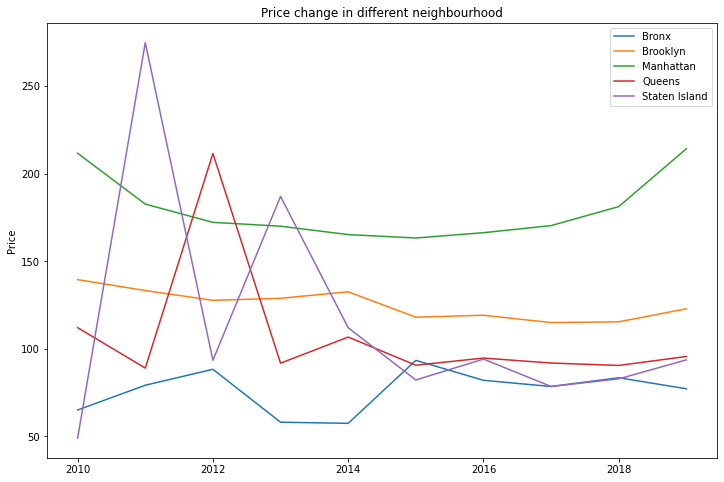

In [ ]:
# Create a variable year for the last review year
new_reviewed_df=reviewed_df.copy()
new_reviewed_df['last_review_year']= reviewed_df['last_review'].apply(lambda x: x.strftime("%Y-%m-%d") [:4])

#Creating a column for the possible year of start
new_reviewed_df['duration']=round((reviewed_df['number_of_reviews']/reviewed_df['reviews_per_month'])/12,0)
new_reviewed_df['possible_year_of_start']=new_reviewed_df['last_review'].dt.year-new_reviewed_df['duration']

#Price change of rooms in different neighbourhood_groups over the time
dict1={}
for group in nbrhood_grp:
  lst1=[]
  for year in range(2010,2020):
    price=new_reviewed_df[(new_reviewed_df['neighbourhood_group']==group) & 
                          (new_reviewed_df['possible_year_of_start']==year) &
                          (new_reviewed_df['last_review'].dt.year >= year)]['price'].mean()
    lst1.append(price)
  dict1.update({group:lst1})

price_df=pd.DataFrame(dict1,index=range(2010,2020))

#Plotting the price change of different neigbhourhood_groups over the time 2010-2019
plt.rcParams['figure.figsize']=(12,8)
for group in nbrhood_grp:
  price_df[group].plot()

plt.xlabel=('Years')
plt.ylabel('Price')
plt.title('Price change in different neighbourhood')
plt.legend()

* Since <b>2014, Manhattan </b> has been  <b>most costly</b> than others.It's price distribution is <b>Stationary</b> in nature.
* In <b> 2011,</b> the price of rooms in <b> Staten Island </b> were most costly than others. It's price has been keep changing over the time.
* In <b> 2012, Queens </b> was at top in charging price for room than others neighbourhood_groups.
* <b> Brooklyn </b> has <b>stationary nature</b> in pricing for a room over the time. The price of a room keeps moving around <b>130-140</b>.
* The pricing of room has been low for <b>Bronx. </b>In year <b> 2019, Bronx</b> charges the <b> least.</b>


Custom question

A year ago on 2018 I came along with my collegues stayed in Brooklyn for a business meeting. The bookings of room per head for a week costs me $120. 

But our next meeting is in the year 2020 in Manhattan. So will a amount of $200 per head is sufficient.

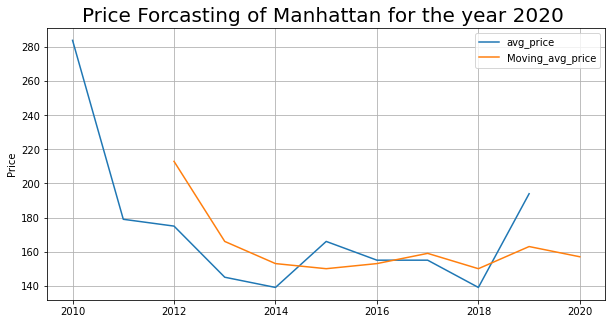

In [ ]:
#Creating a list of Mahhattan yearly price according to the above criteria for prediction
#Manhattan yearly price in the time interval 2010 -2019
price_list=[]
for year in range(2010,2020):
  price=new_reviewed_df[(new_reviewed_df['neighbourhood_group']=='Manhattan') & 
                        (new_reviewed_df['minimum_nights']==7) &
                        (new_reviewed_df['possible_year_of_start']==year) &
                        (new_reviewed_df['last_review'].dt.year >= year)]['price'].mean()
  price_list.append(round(price))

manhattan_yearly_price=pd.DataFrame(price_list,index=range(2010,2020))
manhattan_yearly_price.columns=['avg_price']
manhattan_yearly_price.sort_index(inplace=True)

x=list(range(2010,2020))
x1=x[2:]

#Calculation of 3 year moving average monthly price for manhattan
moving_avg=[]
for i in range(len(price_list)-2):
  a=manhattan_yearly_price[i:i+3].mean()
  moving_avg.append(round(a))

#Forecasting price for 2020 in Manhattan
mv_avg_2020=sum(moving_avg[-3:])/3
moving_avg.append(round(mv_avg_2020))
x1.append(2020)


forcast_df=pd.DataFrame(moving_avg,index=x1)
forcast_df.columns=['Moving_avg_price']
forcast_df.sort_index(inplace=True)


#plotting for 2020
plt.rcParams['figure.figsize'] = (10,5)
#plt.plot(x,list(price_list))
#plt.plot(x1,list(moving_avg))
manhattan_yearly_price['avg_price'].plot()
forcast_df['Moving_avg_price'].plot()
plt.title('Price Forcasting of Manhattan for the year 2020 ',fontsize=20)
plt.ylabel('Price')
plt.xlabel=('Year')
plt.grid()
plt.legend()

* Yes , $200 per head will be sufficient to stay in Manhattan for a week.

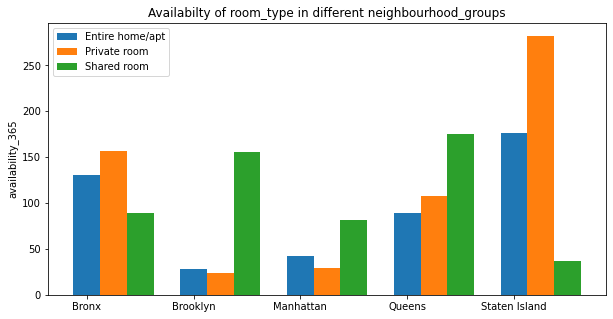

In [ ]:
#side by side bar chart to see the availablity of the rooms in different neighbourhood_groups.
avl_df=airbnb_df.groupby(['neighbourhood_group','room_type'])['availability_365'].median().unstack()
nbrhood_grp=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
Entire_room= list(avl_df['Entire home/apt'])
Private_room=list(avl_df['Private room'])
Shared_room=list(avl_df['Shared room'])

width=0.25
ind = np.arange(len(nbrhood_grp))
  
plt.bar(ind, Entire_room, width , label = 'Entire home/apt')
plt.bar(ind + width,Private_room , width, label = 'Private room')
plt.bar(ind+ width*2,Shared_room, width , label = 'Shared room')
  
plt.xticks(ind,nbrhood_grp)
plt.xlabel=("Neighbourhood_Groups")
plt.ylabel("availability_365")
plt.title("Availabilty of room_type in different neighbourhood_groups")
plt.legend()
plt.show()

* In <b> <i> Staten Island </i> ,Entire home/apt & Private rooms </b> are  easily available but <b> Shared rooms </b> are not easily available.
* On an average, the availbility of rooms of all the types seems to be less in <b>Manhattan </b>.
* Aaah...It looks like, it is very hard to get <b> Entire home/ apt & Private rooms </b> in <b><i> Brooklyn and Manhattan</b></i>. But don't worry it's easily available in <b><i> Staten Island</b></i>
* The availablity of <b>Shared room </B> is more and is same as in <b><i> Brooklyn & Queens </b></i>.
* In <b><i> Bronx </B></i>,all the rooms are easily available.


##### Hypothesis:The host which has more number of properties, they charges less for price room.
#### Null hypothesis H0: There is no correlation between number of host listings count and price.
#### Alternative hypothesis H1:There is some correlation between number of host listings count and price

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(airbnb_df['calculated_host_listings_count'], airbnb_df['price'])

#print Spearman rank correlation and p-value
print(f'The value of spearman correlation coefficent is {rho}')
print(f'The p-value of test is {p}')

The value of spearman correlation coefficent is -0.10608308461077175
The p-value of test is 2.3661834310433083e-122


* As the p-value is less than 0.05 significance level, so we will reject the null hypothesis. Therefore, we conclude that there is some correlation between number of host listings count and price. The sign of correlation is negative, which indicates that as the number of hsot listings count increases the charge for price decreases.

####Going through the some negative reviews and comments, The manager wants to make some changes in the rules and regualtion .So He wants to check whether there is some relationship in choosing the room_type with the minimum nights to spend.

##### To Check the dependency of room_types with the minimum_nights
#### Null hypothesis H0: Room_type and minimum nights are independent ,ie. there is no relationship between them.
#### Alternative hypothesis H1: Room_type and minimum nights are dependent ,ie. there is some relationship between them.

In [ ]:
#Chi -square test to check the dependency of room type with minimum nights.
df_copy=airbnb_df.copy()

#categories of minimum nights column
days=['1_or_2_days','Week','Month','Quarter','Year & +'] 

conditions=[
            (airbnb_df['minimum_nights']<=2),
            ((airbnb_df['minimum_nights']>2) & (airbnb_df['minimum_nights'] <=7)),
            ((airbnb_df['minimum_nights']>7) & (airbnb_df['minimum_nights'] <=30)),
            ((airbnb_df['minimum_nights']>30) & (airbnb_df['minimum_nights'] <=90)),
            (airbnb_df['minimum_nights']>90)
            ]

# creating a new column time_inteval in the dataframe according to the conditions
df_copy['time_interval'] = np.select(conditions, days)

# updated DataFrame
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,time_interval
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1_or_2_days
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1_or_2_days
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Week
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1_or_2_days
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Month


In [ ]:
#count of minimum_nights with room_type in tabular form
tab=df_copy.groupby(['room_type','time_interval'])['time_interval'].count().unstack()

# creating contingency table
data_tab = pd.crosstab(df_copy['room_type'],
                            df_copy['time_interval'],
                           margins=True, margins_name="Total")
data_tab

time_interval,1_or_2_days,Month,Quarter,Week,Year & +,Total
room_type,,,,,,
Entire home/apt,10463,4175,377,10267,127,25409
Private room,13154,2260,164,6686,62,22326
Shared room,799,151,9,193,8,1160
Total,24416,6586,550,17146,197,48895


In [ ]:
# creating contingency table
data_tab = pd.crosstab(df_copy['room_type'],
                            df_copy['time_interval'],
                           margins=True, margins_name="Total")
data_tab

time_interval,1_or_2_days,Month,Quarter,Week,Year & +,Total
room_type,,,,,,
Entire home/apt,10463,4175,377,10267,127,25409
Private room,13154,2260,164,6686,62,22326
Shared room,799,151,9,193,8,1160
Total,24416,6586,550,17146,197,48895


In [ ]:
# Calculating Chisquare statistic
chi_square = 0
rows = df_copy['room_type'].unique()
columns = df_copy['time_interval'].unique()
for i in columns:
    for j in rows:
        O = data_tab[i][j]
        E = data_tab[i]['Total'] * data_tab['Total'][j] / data_tab['Total']['Total']
        chi_square += (O-E)**2/E

#level of significance
alpha=0.05

#test statistic chi-square value
print(f'\n The calculated value of test statistic is {chi_square}')

# The critical value of test statistic at 2 X 4 degress of freedom 
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
print(f'\n The critical value of test statistic is { critical_value}')

# p-value of test
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
print(f'\n The p-value for the test is { p_value}')


 The calculated value of test statistic is 1749.0172864434269

 The critical value of test statistic is 15.50731305586545

 The p-value for the test is 0.0


* As the p-value is <b> less than the significance level 0.05</b>  ,so we will <b>reject the null hypothesis</b>.Therefore , we will conclude that the <b><i>room_types and minimum_nights are not independent </b></i>,i.e. there is some relationship between them.